In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better visuals
sns.set(style="whitegrid")
%matplotlib inline

 **Observation: You should see columns like: PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked.**

In [6]:
# Load Titanic dataset
df = pd.read_csv('train.csv')  
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Missing values in Age, Cabin, Embarked.
Survived is binary (0 = did not survive, 1 = survived).
Pclass is 1, 2, 3 – passenger class.**

In [9]:
# Count unique values in categorical columns
df['Survived'].value_counts()
df['Pclass'].value_counts()
df['Sex'].value_counts()
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

**Age has missing data → could fill with median/mean later.
Cabin has too many missing values → could drop or simplify.
Embarked has few missing → fill with mode.**

In [10]:
# Missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**More passengers did not survive than survived.**

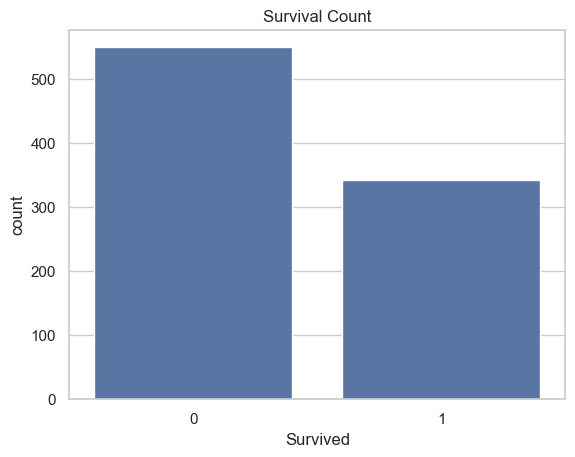

In [11]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

**Females had a higher survival rate than males.**

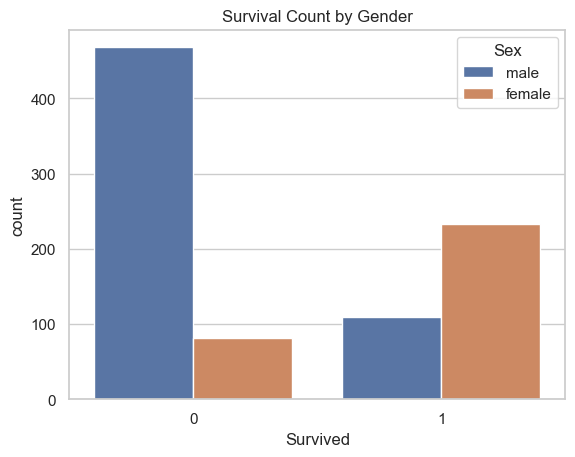

In [12]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.show()

**1st class had higher survival, 3rd class lower survival.**

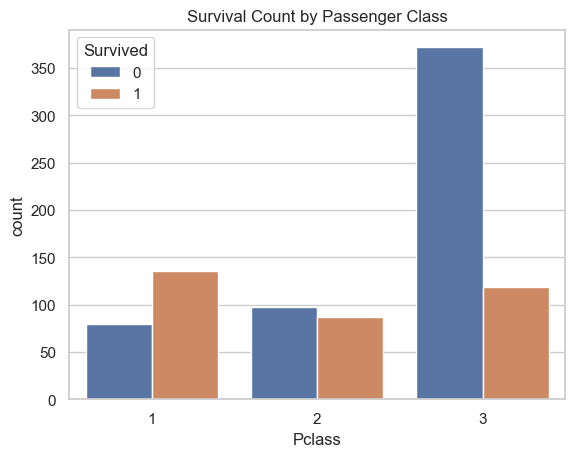

In [13]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()

**Most passengers were young adults (20–40 years).**

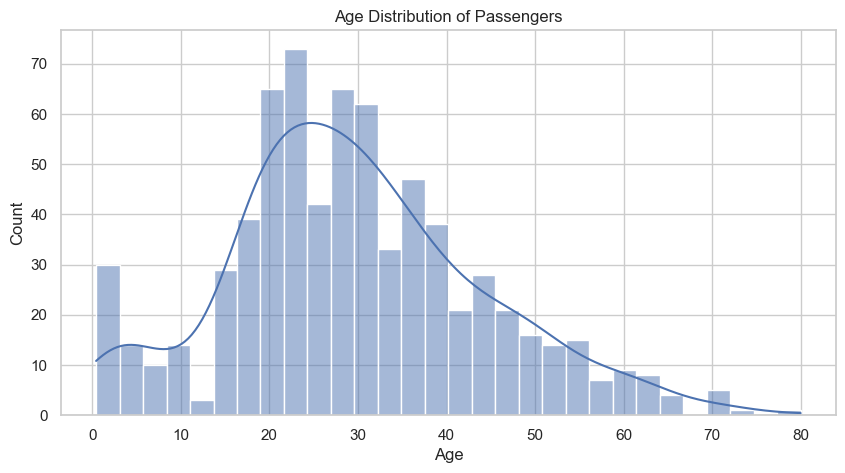

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.show()

**Children (lower age) had slightly higher chance of survival.**

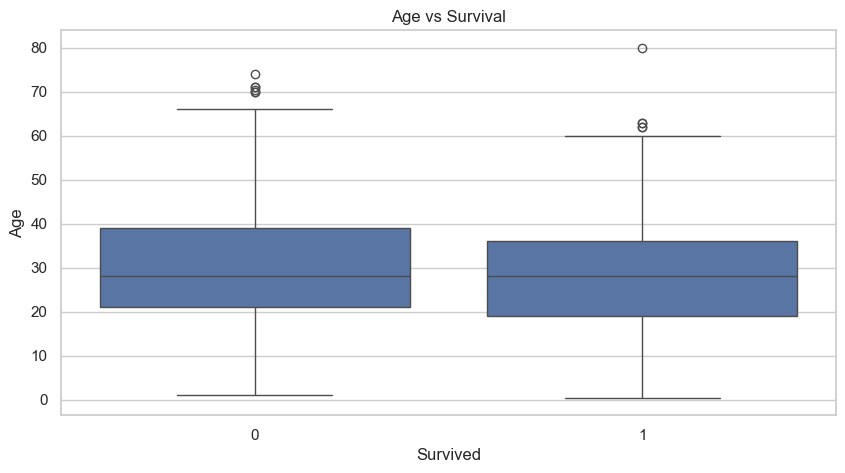

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()

**Pclass negatively correlated with Survived.
Fare positively correlated with Pclass (1st class paid more).**

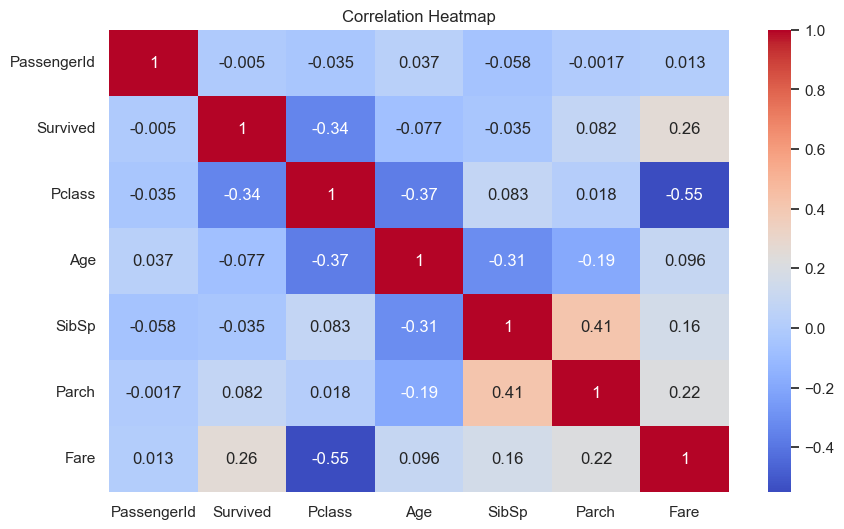

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**You can see clustering trends for fare and age with survival.**

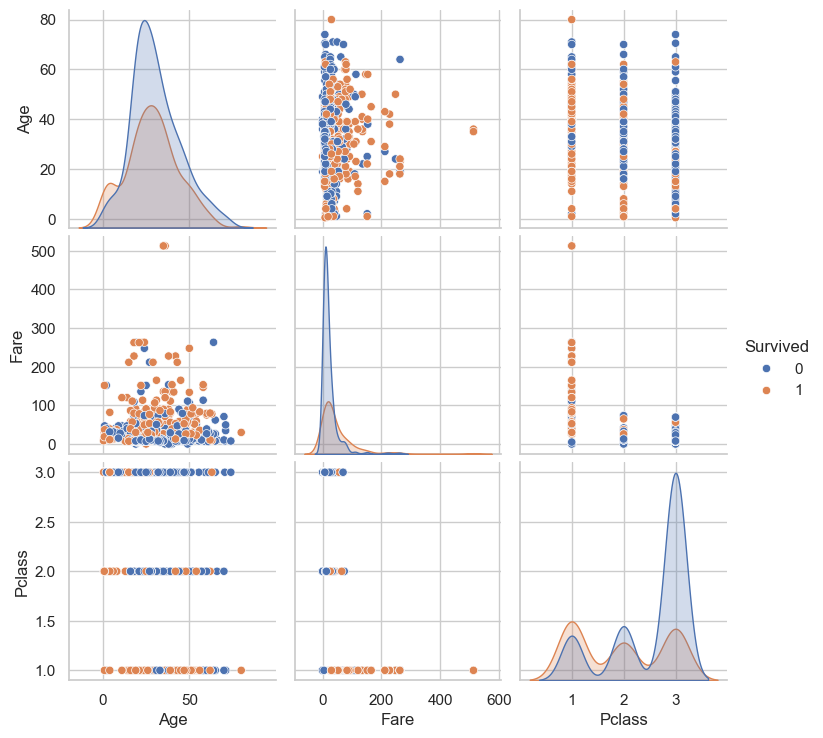

In [17]:
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.show()

**Passengers from C (Cherbourg) had better survival rate than S (Southampton).**

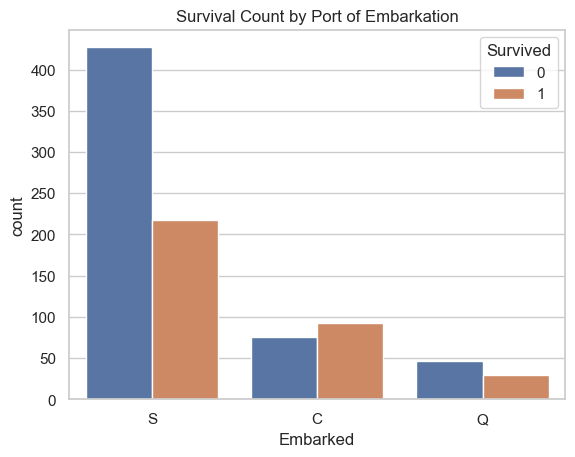

In [18]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Port of Embarkation')
plt.show()

## Summary of Findings

1. Overall survival rate: ~38% of passengers survived.
2. Gender effect: Females had higher survival rate than males.
3. Passenger class effect: 1st class passengers had higher survival than 3rd class.
4. Age effect: Children and young adults had slightly higher survival.
5. Fare correlation: Higher fare passengers had better survival (mostly 1st class).
6. Port of embarkation: Passengers from Cherbourg (C) had slightly better survival.
7. Missing values: Age and Cabin columns need treatment for modeling.